For SVM:
Check these links for reference -
*   https://github.com/MintForever/Machine-Learning-Assignments/blob/master/assignments1-4/xl9yr__assignment_2_svm.ipynb





In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ML colab/RT_IOT2022')
data

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,udp,dns,0.005875,1,1,1,1,170.209561,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,tcp,-,7.807541,159,144,134,38,20.364926,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,tcp,http,0.216894,7,7,1,2,32.273807,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,icmp,-,0.014496,10,10,10,10,689.841286,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,tcp,-,8.797776,158,176,133,45,17.959084,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209954,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209955,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172414,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209956,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
209957,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [4]:
duplicate_rows = data[data.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
        id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
616          5353       5353   udp     dns            0.0             1   
1735         5353       5353   udp     dns            0.0             1   
1761         5353       5353   udp     dns            0.0             1   
2201         5353       5353   udp     dns            0.0             1   
2373        48692        443   tcp       -            0.0             1   
...           ...        ...   ...     ...            ...           ...   
206059       5353       5353   udp     dns            0.0             1   
206109      59342         80   tcp       -            0.0             1   
206548       5353       5353   udp     dns            0.0             1   
206675       5353       5353   udp     dns            0.0             1   
206676       5353       5353   udp     dns            0.0             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
616

In [5]:
# Save DataFrame as a CSV file
duplicate_rows.to_csv('duplicate_rows.csv', index=False)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(204544, 84)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204544 entries, 0 to 209958
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 204544 non-null  int64  
 1   id.resp_p                 204544 non-null  int64  
 2   proto                     204544 non-null  object 
 3   service                   204544 non-null  object 
 4   flow_duration             204544 non-null  float64
 5   fwd_pkts_tot              204544 non-null  int64  
 6   bwd_pkts_tot              204544 non-null  int64  
 7   fwd_data_pkts_tot         204544 non-null  int64  
 8   bwd_data_pkts_tot         204544 non-null  int64  
 9   fwd_pkts_per_sec          204544 non-null  float64
 10  bwd_pkts_per_sec          204544 non-null  float64
 11  flow_pkts_per_sec         204544 non-null  float64
 12  down_up_ratio             204544 non-null  float64
 13  fwd_header_size_tot       204544 non-null  int64 

In [9]:
data['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 90089
Alexa                         86622
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [10]:
data['proto'].value_counts()

proto
tcp     185349
udp      17157
icmp      2038
Name: count, dtype: int64

In [11]:
data.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

In [12]:
# Dropping rows based on 'Attack_type' column values as these have very low values

data_new = data[~data['Attack_type'].isin(['Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN'])]

In [13]:
data_new['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping          90089
Alexa                  86622
Thing_Speak             7654
ARP_poisioning          7625
MQTT_Publish            4142
NMAP_UDP_SCAN           2584
NMAP_XMAS_TREE_SCAN     2010
NMAP_OS_DETECTION       2000
NMAP_TCP_scan           1002
DDOS_Slowloris           533
Wipro_bulb               219
Name: count, dtype: int64

In [14]:
data_new.shape

(204480, 84)

In [15]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [16]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['proto'], use_cat_names=True)

# Fit and transform the data
X_new = encoder.fit_transform(data_new)


In [17]:
X_new.head()

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,1,0,0,dns,0.005875,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,0,1,0,-,7.807541,159,144,134,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,0,1,0,http,0.216894,7,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,0,0,1,-,0.014496,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,0,1,0,-,8.797776,158,176,133,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa


##BALANCING DATASET

# **SOLVING IMBALANCE----------------------------------------------------------------------**

# **OVERSAMPLING THE LOWER CLASSES**

In [18]:
X_new.to_csv('complete_encoded_dataset.csv', index=False)

In [19]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')
large_df.head()

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,1,0,0,dns,0.005875,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,0,1,0,-,7.807541,159,144,134,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,0,1,0,http,0.216894,7,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,0,0,1,-,0.014496,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,0,1,0,-,8.797776,158,176,133,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa


In [20]:
# Define the specific class labels you want to filter
desired_labels = ['NMAP_TCP_scan', 'DDOS_Slowloris', 'Wipro_bulb']

# Filter the dataset to include only rows with desired class labels
smaller_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
smaller_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
smaller_df.to_csv('lower_class_dataset.csv', index=False)

In [21]:
data_to_oversamp=pd.read_csv('lower_class_dataset.csv')
data_to_oversamp

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,52170,443,0,1,0,ssl,1.873034,10,11,5,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4380,65535,4380,Wipro_bulb
1,62443,53,1,0,0,dns,0.006028,1,1,1,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,Wipro_bulb
2,49795,6668,0,1,0,-,22.644121,5,6,2,...,3.016278e+06,6.129479e+06,1.186331e+07,1.799279e+07,8.996395e+06,4.054432e+06,65535,4380,0,Wipro_bulb
3,49797,6668,0,1,0,irc,78.044458,38,25,13,...,4.518600e+06,5.014912e+06,5.916898e+06,3.166231e+07,5.277051e+06,3.381018e+05,65535,4380,65535,Wipro_bulb
4,49800,6668,0,1,0,irc,96.762810,69,53,24,...,8.109717e+06,5.859550e+06,1.657937e+07,5.130929e+07,8.551548e+06,4.045696e+06,65535,4380,65535,Wipro_bulb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,59074,64623,0,1,0,-,0.000001,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1750,49670,64680,0,1,0,-,0.000004,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1751,47298,65000,0,1,0,-,0.000003,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240,0,64240,NMAP_TCP_scan
1752,49246,65129,0,1,0,-,0.000002,1,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240,0,64240,NMAP_TCP_scan


In [22]:
data_to_oversamp['Attack_type'].value_counts()

Attack_type
NMAP_TCP_scan     1002
DDOS_Slowloris     533
Wipro_bulb         219
Name: count, dtype: int64

In [23]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_oversamp = data_to_oversamp['Attack_type']
X_oversamp = data_to_oversamp.drop(columns=['Attack_type', 'service'])
X_oversamp

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,52170,443,0,1,0,1.873034,10,11,5,4,...,2.761923e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4380,65535,4380
1,62443,53,1,0,0,0.006028,1,1,1,1,...,6.027937e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0
2,49795,6668,0,1,0,22.644121,5,6,2,5,...,2.325666e+06,3.016278e+06,6.129479e+06,1.186331e+07,1.799279e+07,8.996395e+06,4.054432e+06,65535,4380,0
3,49797,6668,0,1,0,78.044458,38,25,13,13,...,6.627024e+06,4.518600e+06,5.014912e+06,5.916898e+06,3.166231e+07,5.277051e+06,3.381018e+05,65535,4380,65535
4,49800,6668,0,1,0,96.762810,69,53,24,34,...,6.495426e+06,8.109717e+06,5.859550e+06,1.657937e+07,5.130929e+07,8.551548e+06,4.045696e+06,65535,4380,65535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,59074,64623,0,1,0,0.000001,1,1,0,0,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240,0,64240
1750,49670,64680,0,1,0,0.000004,1,1,0,0,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240,0,64240
1751,47298,65000,0,1,0,0.000003,1,1,0,0,...,3.099442e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240,0,64240
1752,49246,65129,0,1,0,0.000002,1,1,0,0,...,1.907349e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240,0,64240


In [24]:
y_oversamp

0          Wipro_bulb
1          Wipro_bulb
2          Wipro_bulb
3          Wipro_bulb
4          Wipro_bulb
            ...      
1749    NMAP_TCP_scan
1750    NMAP_TCP_scan
1751    NMAP_TCP_scan
1752    NMAP_TCP_scan
1753    NMAP_TCP_scan
Name: Attack_type, Length: 1754, dtype: object

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train_oversamp, X_test_oversamp, y_train_oversamp, y_test_oversamp = train_test_split(X_oversamp, y_oversamp, test_size=0.3, random_state=42)

In [26]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Define the desired number of samples for each class
# For example, if you want to oversample class 0 to have 1000 instances and class 1 to have 1500 instances
desired_samples = {'NMAP_TCP_scan':1200, 'DDOS_Slowloris':1200, 'Wipro_bulb':1200}
#desired_samples = {'NMAP_TCP_scan':5000, 'DDOS_Slowloris':5000, 'Wipro_bulb':5000}
#CHANGE THIS----------------------------------------------------------------------------------------------------------------------------

# Initialize the SMOTE algorithm with a custom sampling strategy
smote = SMOTE(sampling_strategy=desired_samples, random_state=42)

# Oversample the dataset
X_smote, y_smote = smote.fit_resample(X_train_oversamp, y_train_oversamp)

# Check the class distribution after oversampling
print(pd.Series(y_smote).value_counts())


Attack_type
DDOS_Slowloris    1200
NMAP_TCP_scan     1200
Wipro_bulb        1200
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class NMAP_TCP_scan will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class DDOS_Slowloris will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1200) in class Wipro_bulb will be larger than the number of samples in the majority class (class #NMAP_TCP_scan -> 696)
  warnings.warn(


In [27]:
X_oversampled = pd.concat([X_smote, X_test_oversamp], axis=0)
y_oversampled= pd.concat([y_smote, y_test_oversamp],axis=0)

In [28]:
from collections import Counter

counter = Counter(y_oversampled)
print('Before',counter)

Before Counter({'NMAP_TCP_scan': 1506, 'DDOS_Slowloris': 1366, 'Wipro_bulb': 1255})


# **STRATIFIED SAMPLING OF THE UPPER CLASSES**

In [29]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')

# Define the specific class labels you want to filter
desired_labels = ['DOS_SYN_Hping', 'Alexa']

# Filter the dataset to include only rows with desired class labels
upperclass_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
upperclass_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
upperclass_df.to_csv('upper_class_dataset.csv', index=False)

In [30]:
data_to_stratify=pd.read_csv('upper_class_dataset.csv')
data_to_stratify

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,31004,53,1,0,0,dns,0.005875,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
1,54222,443,0,1,0,-,7.807541,159,144,134,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890,Alexa
2,48618,80,0,1,0,http,0.216894,7,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065,Alexa
3,8,0,0,0,1,-,0.014496,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Alexa
4,54222,443,0,1,0,-,8.797776,158,176,133,...,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890,Alexa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176706,34865,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176707,42729,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176708,44682,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping
176709,41378,21,0,1,0,-,0.000000,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64,DOS_SYN_Hping


In [31]:
data_to_stratify['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping    90089
Alexa            86622
Name: count, dtype: int64

In [32]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_to_stratify = data_to_stratify['Attack_type']
X_to_stratify = data_to_stratify.drop(columns=['Attack_type', 'service'])
X_to_stratify

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,31004,53,1,0,0,0.005875,1,1,1,1,...,5.875111e+03,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,54222,443,0,1,0,7.807541,159,144,134,38,...,7.807541e+06,0.0,0.0,0.0,0.0,0.0,0.0,11890,3216,11890
2,48618,80,0,1,0,0.216894,7,7,1,2,...,3.060679e+05,0.0,0.0,0.0,0.0,0.0,0.0,29200,29200,1065
3,8,0,0,0,1,0.014496,10,10,10,10,...,1.449609e+04,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,54222,443,0,1,0,8.797776,158,176,133,45,...,8.797776e+06,0.0,0.0,0.0,0.0,0.0,0.0,11890,3220,11890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176706,34865,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176707,42729,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176708,44682,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64
176709,41378,21,0,1,0,0.000000,1,0,1,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64,0,64


In [33]:
len(X_to_stratify)

176711

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Define the number of samples you want for each class
# num_samples_per_class = 5000
num_samples_per_class = 1200

# Compute the number of classes
num_classes = len(np.unique(y_to_stratify))

# Compute the total number of samples to select
total_samples_to_select = num_samples_per_class * num_classes

# Calculate the ratio of samples to select
test_size = min(1.0, total_samples_to_select / len(X_to_stratify))

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

# Get the indices for stratified sampling
for train_index, _ in stratified_split.split(X_to_stratify, y_to_stratify):
    X_stratified, y_stratified = X_to_stratify.iloc[train_index], y_to_stratify.iloc[train_index]
    break

# Check the class distribution after stratified sampling
print(pd.Series(y_stratified).value_counts())


Attack_type
DOS_SYN_Hping    88865
Alexa            85446
Name: count, dtype: int64


In [35]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X_to_stratify, y_to_stratify)

# Check the class distribution after undersampling
print(pd.Series(y_resampled).value_counts())


Attack_type
Alexa            86622
DOS_SYN_Hping    86622
Name: count, dtype: int64


In [36]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X_to_stratify and y_to_stratify are your feature and target data, respectively

# Define the number of samples you want for each class
num_samples_per_class = 1200

# Get unique class labels from y_to_stratify
unique_classes = y_to_stratify.unique()

# Initialize lists to store the stratified samples
stratified_samples_X = []
stratified_samples_y = []

# Perform stratified sampling for each class
for class_label in unique_classes:
    # Filter data for the current class
    X_class = X_to_stratify[y_to_stratify == class_label]
    y_class = y_to_stratify[y_to_stratify == class_label]

    # Ensure the number of samples to select does not exceed the available samples
    num_samples_to_select = min(num_samples_per_class, len(X_class))

    # Perform stratified sampling for the current class
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=num_samples_to_select, random_state=42)
    for train_index, _ in stratified_split.split(X_class, y_class):
        X_stratified_class, y_stratified_class = X_class.iloc[train_index], y_class.iloc[train_index]

    # Add the stratified samples for the current class to the lists
    stratified_samples_X.append(X_stratified_class)
    stratified_samples_y.append(y_stratified_class)

# Concatenate the stratified samples for all classes
if stratified_samples_X and stratified_samples_y:
    X_stratified = pd.concat(stratified_samples_X)
    y_stratified = pd.concat(stratified_samples_y)

    # Shuffle the concatenated samples
    stratified_indices = pd.RangeIndex(len(X_stratified))
    stratified_indices_permuted = stratified_indices.to_numpy()
    np.random.shuffle(stratified_indices_permuted)
    X_stratified = X_stratified.iloc[stratified_indices_permuted]
    y_stratified = y_stratified.iloc[stratified_indices_permuted]

    # Trim excess samples if necessary
    num_samples_to_trim = len(X_stratified) - (num_samples_per_class * len(unique_classes))
    if num_samples_to_trim > 0:
        X_stratified = X_stratified[:-num_samples_to_trim]
        y_stratified = y_stratified[:-num_samples_to_trim]

    # Check the class distribution after stratified sampling
    print(pd.Series(y_stratified).value_counts())
else:
    print("Error: No samples available for any class. Unable to perform stratified sampling.")


Attack_type
DOS_SYN_Hping    1221
Alexa            1179
Name: count, dtype: int64


# **MIDDLE PORTION**

In [37]:
import pandas as pd

# Load the large dataset
large_df = pd.read_csv('complete_encoded_dataset.csv')

# Define the specific class labels you want to filter
desired_labels = ['Thing_Speak' ,'ARP_poisioning'    ,      'MQTT_Publish'     ,       'NMAP_UDP_SCAN' ,         'NMAP_XMAS_TREE_SCAN'  ,   'NMAP_OS_DETECTION'     ]

# Filter the dataset to include only rows with desired class labels
middle_df = large_df[large_df['Attack_type'].isin(desired_labels)]

# Optionally, you can reset the index of the smaller DataFrame
smaller_df.reset_index(drop=True, inplace=True)

# Save the smaller dataset to a new file if needed
middle_df.to_csv('mid_classes_dataset.csv', index=False)

In [38]:
data_mid=pd.read_csv('mid_classes_dataset.csv')

In [39]:
data_mid['Attack_type'].value_counts()

Attack_type
Thing_Speak            7654
ARP_poisioning         7625
MQTT_Publish           4142
NMAP_UDP_SCAN          2584
NMAP_XMAS_TREE_SCAN    2010
NMAP_OS_DETECTION      2000
Name: count, dtype: int64

In [40]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
y_mid = data_mid['Attack_type']
X_mid = data_mid.drop(columns=['Attack_type', 'service'])
X_mid

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,0,1,0,32.011598,9,5,3,3,...,2.282415e+06,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502
1,51143,1883,0,1,0,31.883584,9,5,3,3,...,2.028307e+06,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502
2,44761,1883,0,1,0,32.124053,9,5,3,3,...,2.281904e+06,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502
3,60893,1883,0,1,0,31.961063,9,5,3,3,...,2.047288e+06,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502
4,51087,1883,0,1,0,31.902362,9,5,3,3,...,2.087657e+06,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26010,59247,63331,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024
26011,59247,64623,0,1,0,0.000007,1,1,0,0,...,6.914139e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024
26012,59247,64680,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024
26013,59247,65000,0,1,0,0.000006,1,1,0,0,...,5.960464e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024


In [41]:
y_mid.shape

(26015,)

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Define the number of samples you want for each class
# num_samples_per_class = 5000
num_samples_per_class = 1200

# Compute the number of classes
num_classes = len(np.unique(y_mid))

# Compute the total number of samples to select
total_samples_to_select = num_samples_per_class * num_classes

# Calculate the ratio of samples to select
test_size = min(1.0, total_samples_to_select / len(X_mid))

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

# Get the indices for stratified sampling
for train_index, _ in stratified_split.split(X_mid, y_mid):
    X_stratified, y_stratified = X_mid.iloc[train_index], y_mid.iloc[train_index]
    break

# Check the class distribution after stratified sampling
print(pd.Series(y_stratified).value_counts())


Attack_type
Thing_Speak            5536
ARP_poisioning         5515
MQTT_Publish           2995
NMAP_UDP_SCAN          1869
NMAP_XMAS_TREE_SCAN    1454
NMAP_OS_DETECTION      1446
Name: count, dtype: int64


In [43]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X_mid, y_mid)

# Check the class distribution after undersampling
print(pd.Series(y_resampled).value_counts())


Attack_type
ARP_poisioning         2000
MQTT_Publish           2000
NMAP_OS_DETECTION      2000
NMAP_UDP_SCAN          2000
NMAP_XMAS_TREE_SCAN    2000
Thing_Speak            2000
Name: count, dtype: int64


In [44]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X_to_stratify and y_to_stratify are your feature and target data, respectively

# Define the number of samples you want for each class
num_samples_per_class = 1200

# Get unique class labels from y_to_stratify
unique_classes = y_mid.unique()

# Initialize lists to store the stratified samples
stratified_samples_X = []
stratified_samples_y = []

# Perform stratified sampling for each class
for class_label in unique_classes:
    # Filter data for the current class
    X_class = X_mid[y_mid == class_label]
    y_class = y_mid[y_mid == class_label]

    # Ensure the number of samples to select does not exceed the available samples
    num_samples_to_select = min(num_samples_per_class, len(X_class))

    # Create StratifiedShuffleSplit object for stratified sampling
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=num_samples_to_select, random_state=42)

    # Split the data into training and test sets
    for train_index, _ in stratified_split.split(X_class, y_class):
        X_stratified_class, y_stratified_class = X_class.iloc[train_index], y_class.iloc[train_index]

    # Add the stratified samples for the current class to the lists
    stratified_samples_X.append(X_stratified_class)
    stratified_samples_y.append(y_stratified_class)

# Concatenate the stratified samples for all classes
if stratified_samples_X and stratified_samples_y:
    X_stratified_mid = pd.concat(stratified_samples_X)
    y_stratified_mid = pd.concat(stratified_samples_y)

    # Shuffle the concatenated samples
    stratified_indices = pd.RangeIndex(len(X_stratified_mid))
    stratified_indices_permuted = stratified_indices.to_numpy()
    np.random.shuffle(stratified_indices_permuted)
    X_stratified_mid = X_stratified_mid.iloc[stratified_indices_permuted]
    y_stratified_mid = y_stratified_mid.iloc[stratified_indices_permuted]

    # Trim excess samples if necessary
    num_samples_to_trim = len(X_stratified_mid) - (num_samples_per_class * len(unique_classes))
    if num_samples_to_trim > 0:
        X_stratified_mid = X_stratified_mid[:-num_samples_to_trim]
        y_stratified_mid = y_stratified_mid[:-num_samples_to_trim]

    # Check the class distribution after stratified sampling
    print(pd.Series(y_stratified_mid).value_counts())
else:
    print("Error: No samples available for any class. Unable to perform stratified sampling.")


Attack_type
ARP_poisioning         2464
Thing_Speak            2463
MQTT_Publish           1140
NMAP_UDP_SCAN           521
NMAP_XMAS_TREE_SCAN     314
NMAP_OS_DETECTION       298
Name: count, dtype: int64


# **COMBINING EVERYTHING**

In [45]:
# X_combined=pd.concat([X_oversampled, X_stratified, X_mid], axis=0, ignore_index=True)
# y_combined=pd.concat([y_oversampled, y_stratified, y_mid], axis=0, ignore_index=True)

X_combined=pd.concat([X_oversampled, X_stratified, X_stratified_mid], axis=0, ignore_index=True)
y_combined=pd.concat([y_oversampled, y_stratified, y_stratified_mid], axis=0, ignore_index=True)

In [46]:
from collections import Counter

counter = Counter(y_combined)
print('Before',counter)

Before Counter({'Thing_Speak': 7999, 'ARP_poisioning': 7979, 'MQTT_Publish': 4135, 'NMAP_UDP_SCAN': 2390, 'NMAP_XMAS_TREE_SCAN': 1768, 'NMAP_OS_DETECTION': 1744, 'NMAP_TCP_scan': 1506, 'DDOS_Slowloris': 1366, 'Wipro_bulb': 1255})


# **SCALING**

In [47]:
# Separate features and target variable
# x = data_new.drop('Attack_type', axis=1)
# y = X_new['Attack_type']
# X = X_new.drop(columns=['Attack_type', 'service'])
# X

In [ ]:
# Scale the features

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)


In [ ]:
# X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# X_scaled_df.head()

In [ ]:
# X_scaled_df.shape

In [48]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_combined)
X_scaled

array([[7.62277297e-01, 1.22344737e-03, 0.00000000e+00, ...,
        9.80239567e-01, 9.94277867e-01, 7.66002899e-03],
       [7.61207713e-01, 1.22344737e-03, 0.00000000e+00, ...,
        9.80239567e-01, 9.94277867e-01, 7.66002899e-03],
       [8.44604712e-01, 1.22344737e-03, 0.00000000e+00, ...,
        9.80239567e-01, 9.94277867e-01, 7.64476997e-03],
       ...,
       [9.01353788e-01, 6.77483980e-03, 0.00000000e+00, ...,
        9.80239567e-01, 4.09658961e-01, 0.00000000e+00],
       [6.83128075e-01, 8.10533882e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.24539315e-01, 8.18639221e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [49]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_combined.columns)

X_scaled_df.head()

,id.orig_p,id.resp_p,proto_udp,proto_tcp,proto_icmp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,0.762277,0.001223,0.0,1.0,0.0,1.468589e-07,0.000921,0.000297,0.000460,0.000000,...,7.294362e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.994278,0.007660
1,0.761208,0.001223,0.0,1.0,0.0,2.360512e-07,0.000921,0.000297,0.000460,0.000000,...,1.172384e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.994278,0.007660
2,0.844605,0.001223,0.0,1.0,0.0,1.406659e-03,0.001841,0.000692,0.000921,0.000099,...,2.550319e-03,0.004042,0.038278,0.052449,0.001298,0.045363,0.024883,0.98024,0.994278,0.007645
3,0.845797,0.001223,0.0,1.0,0.0,1.308845e-03,0.001381,0.000494,0.000921,0.000000,...,3.244906e-06,0.000005,0.031207,0.063579,0.001356,0.047393,0.056843,0.98024,0.994278,0.007660
4,0.818262,0.065439,0.0,1.0,0.0,2.761371e-10,0.000230,0.000099,0.000000,0.000000,...,1.416910e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98024,0.000000,0.980240


In [50]:
X_scaled_df.shape

(30142, 84)

In [51]:
y_combined

0        DDOS_Slowloris
1        DDOS_Slowloris
2        DDOS_Slowloris
3        DDOS_Slowloris
4         NMAP_TCP_scan
              ...      
30137    ARP_poisioning
30138    ARP_poisioning
30139       Thing_Speak
30140       Thing_Speak
30141    ARP_poisioning
Name: Attack_type, Length: 30142, dtype: object

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_combined, test_size=0.3, random_state=42)


## **FEATURE SELECTION**

Optimal Number of Features: 49
Testing Accuracy with Optimal Number of Features: 0.9698846253087101
Optimal Selected Features and their Chi-squared Scores:
id.resp_p: 2717.4336283524935
proto_udp: 5859.65345304626
proto_tcp: 4355.748403324128
flow_duration: 220.97170150350203
fwd_pkts_per_sec: 4950.916356296973
bwd_pkts_per_sec: 4989.438796570215
flow_pkts_per_sec: 4970.077759793367
down_up_ratio: 305.4298668691346
fwd_header_size_min: 1709.2834299720957
fwd_header_size_max: 1660.3242870399763
bwd_header_size_min: 2189.4270213040227
bwd_header_size_max: 2583.335459277357
flow_FIN_flag_count: 792.2882158537319
flow_SYN_flag_count: 1291.973054671119
flow_RST_flag_count: 599.0802361173852
fwd_URG_flag_count: 19778.31632653033
flow_CWR_flag_count: 151.6852933613158
flow_ECE_flag_count: 170.57248815760806
fwd_pkts_payload.min: 215.84653600568876
fwd_pkts_payload.max: 1080.0238086243228
fwd_pkts_payload.avg: 336.317659170445
fwd_pkts_payload.std: 605.8320684591375
bwd_pkts_payload.min: 221.7

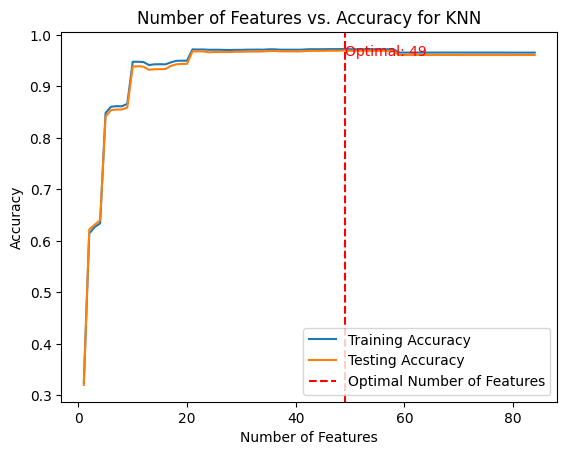

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_combined, test_size=0.3, random_state=42)

# Initialize SelectKBest with chi-square
max_features = X_train.shape[1]
selected_features = []
chi2_scores = []

# Initialize arrays to store accuracies
train_accuracies_knn = []
test_accuracies_knn = []

# Iterate over different number of features
for i in range(1, max_features + 1):
    # Select features using SelectKBest
    selector = SelectKBest(score_func=chi2, k=i)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    mask = selector.get_support()
    features = X_train.columns[mask]
    selected_features.append(features.tolist())
    chi2_scores.append(selector.scores_[mask])

    # Initialize arrays to store accuracies for different k values
    train_accuracies_for_k = []
    test_accuracies_for_k = []

    # Iterate over different k values
    k_values = [3, 5, 11, 19, 30, 50, 70, 100, 150]
    for k in k_values:  # Assume k ranges from 1 to 20
        # Initialize KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train KNN classifier
        knn.fit(X_train_selected, y_train)

        # Predict on training and testing data
        train_pred = knn.predict(X_train_selected)
        test_pred = knn.predict(X_test_selected)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        # Append accuracies for current k value
        train_accuracies_for_k.append(train_accuracy)
        test_accuracies_for_k.append(test_accuracy)

    # Append mean accuracies for current number of features
    train_accuracies_knn.append(np.mean(train_accuracies_for_k))
    test_accuracies_knn.append(np.mean(test_accuracies_for_k))

# Find the optimal number of features
optimal_num_features = np.argmax(test_accuracies_knn) + 1  # Adding 1 because indexing starts from 0
optimal_accuracy_knn = test_accuracies_knn[optimal_num_features - 1]  # Retrieve the accuracy corresponding to the optimal number of features

print("Optimal Number of Features:", optimal_num_features)
print("Testing Accuracy with Optimal Number of Features:", optimal_accuracy_knn)

# Get the feature names and chi-squared scores for the optimal number of features
optimal_features = selected_features[optimal_num_features - 1]
optimal_chi2_scores = chi2_scores[optimal_num_features - 1]

# Print the feature names and their chi-squared scores for the optimal number of features
print("Optimal Selected Features and their Chi-squared Scores:")
for feature, score in zip(optimal_features, optimal_chi2_scores):
    print(f"{feature}: {score}")

# Plot the graph
plt.plot(range(1, max_features + 1), train_accuracies_knn, label='Training Accuracy')
plt.plot(range(1, max_features + 1), test_accuracies_knn, label='Testing Accuracy')
plt.title('Number of Features vs. Accuracy for KNN')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.axvline(x=optimal_num_features, color='r', linestyle='--', label='Optimal Number of Features')
plt.text(optimal_num_features + 0.1, optimal_accuracy_knn - 0.01, f'Optimal: {optimal_num_features}', color='r')
plt.legend()
plt.show()


## **PCA**

PCA reduced the feature space to 9 components.


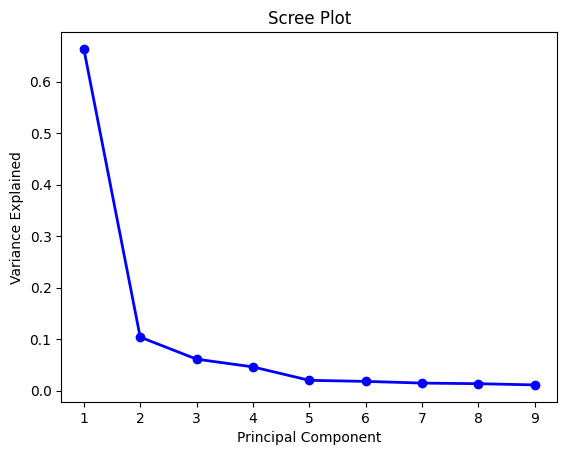

In [ ]:
# Applying PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled_df)

# The number of components chosen by PCA
n_components = pca.n_components_
print(f"PCA reduced the feature space to {n_components} components.")

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## **PCA WITH ACCURACY**

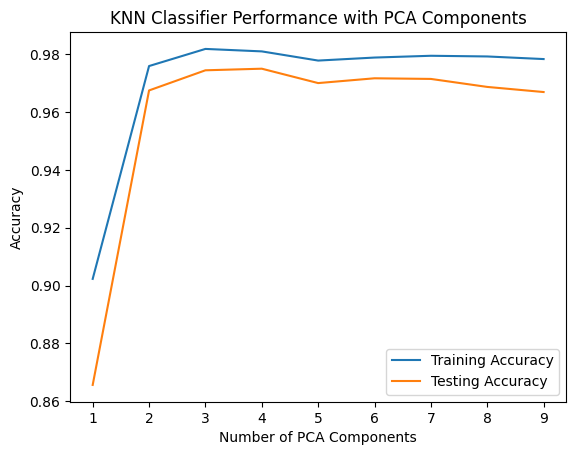

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different numbers of PCA components
for n in range(1, n_components+1):
    # Applying PCA
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled_df)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_combined, test_size=0.3, random_state=42)

    # Training KNN classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    # Calculating training accuracy
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Calculating testing accuracy
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the training and testing accuracies
plt.plot(range(1, n_components+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, n_components+1), test_accuracies, label='Testing Accuracy')
plt.title('KNN Classifier Performance with PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_combined, test_size=0.3, random_state=42)

## **APPLYING KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier()

# Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_test, y_test) #testing accuracy

0.9785469423863762

In [ ]:
knn.score(X_train, y_train)#training accuracy

0.9998578131665008

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

f1_score(y_test, test_pred, average='macro')

0.9742281188095091

In [ ]:
accuracy_score(y_test, test_pred) #similar to clf.score

0.9661616720115006

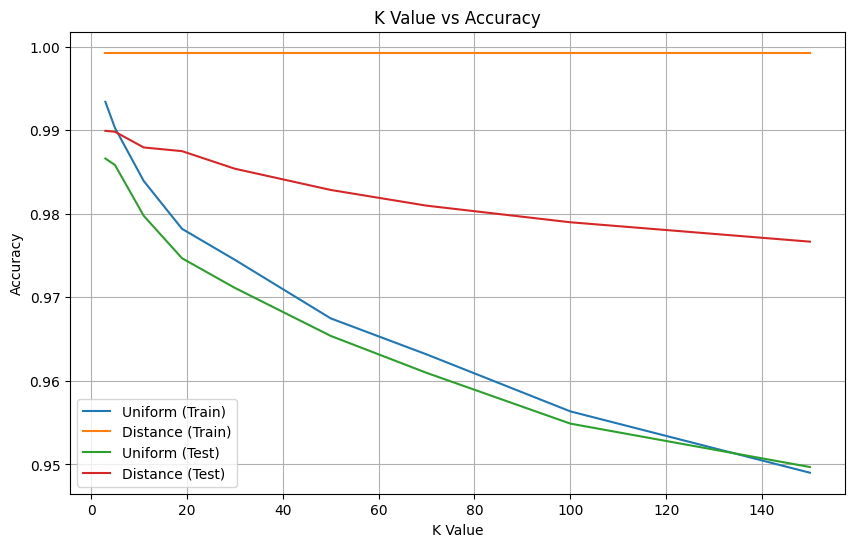

In [63]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define the parameters for grid search
knn_params = {'n_neighbors': [3, 5, 11, 19, 30, 50, 70, 100, 150], 'weights': ['uniform', 'distance']}

X_train_selected_optimal = X_train[optimal_features]
X_test_selected_optimal = X_test[optimal_features]
# Perform grid search with cross-validation
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train_selected_optimal, y_train)

# Extracting the results of the grid search
results_df = pd.DataFrame(knn_grid.cv_results_)

# Calculate training and testing accuracies
train_acc_uniform = []
test_acc_uniform = []
train_acc_distance = []
test_acc_distance = []

for n_neighbors in knn_params['n_neighbors']:
    knn_classifier_uniform = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    knn_classifier_uniform.fit(X_train_selected_optimal, y_train)
    train_acc_uniform.append(accuracy_score(y_train, knn_classifier_uniform.predict(X_train_selected_optimal)))
    test_acc_uniform.append(accuracy_score(y_test, knn_classifier_uniform.predict(X_test_selected_optimal)))

    knn_classifier_distance = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    knn_classifier_distance.fit(X_train_selected_optimal, y_train)
    train_acc_distance.append(accuracy_score(y_train, knn_classifier_distance.predict(X_train_selected_optimal)))
    test_acc_distance.append(accuracy_score(y_test, knn_classifier_distance.predict(X_test_selected_optimal)))

# Plotting train and testing accuracy vs. the number of k
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(knn_params['n_neighbors'], train_acc_uniform,  label='Uniform (Train)')
plt.plot(knn_params['n_neighbors'], train_acc_distance,  label='Distance (Train)')

# Plot testing accuracy
plt.plot(knn_params['n_neighbors'], test_acc_uniform,  label='Uniform (Test)')
plt.plot(knn_params['n_neighbors'], test_acc_distance, label='Distance (Test)')

plt.title('K Value vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
confusion_matrix(y_test, y_pred)

array([[2309,    4,    0,    0,    1,    1,    0,   41,   11],
       [   3,  384,    0,    0,    0,   12,    0,    0,    1],
       [   1,    0, 1276,    0,    0,    0,    0,    0,    1],
       [   0,    0,    0,  546,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,  439,    0,    0,    0,    0],
       [   9,    5,    0,    0,    0,  698,    0,    1,    0],
       [   2,    0,    0,    0,    0,    0,  497,    0,    0],
       [ 103,    0,    0,    0,    0,    0,    0, 2283,    3],
       [  11,    3,    0,    0,    0,    1,    0,    2,  393]])

In [ ]:
accuracy_score(y_test, y_pred) #similar to clf.score

0.9839654981753843

In [ ]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.97200167, 0.97715736, 0.99921691, 1.        , 0.99772727,
        0.9789916 , 1.        , 0.98268581, 0.97342995]),
 array([0.9826785 , 0.9625    , 0.99843505, 1.        , 0.99546485,
        0.98036466, 0.99599198, 0.97404772, 0.98292683]),
 array([0.97731092, 0.9697733 , 0.99882583, 1.        , 0.99659478,
        0.97967765, 0.99799197, 0.9783477 , 0.97815534]),
 array([2367,  400, 1278,  546,  441,  713,  499, 2389,  410]))

In [ ]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

     ARP_poisioning       0.97      0.98      0.98      2367
     DDOS_Slowloris       0.98      0.96      0.97       400
       MQTT_Publish       1.00      1.00      1.00      1278
  NMAP_OS_DETECTION       1.00      1.00      1.00       546
      NMAP_TCP_scan       1.00      1.00      1.00       441
      NMAP_UDP_SCAN       0.98      0.98      0.98       713
NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       499
        Thing_Speak       0.98      0.97      0.98      2389
         Wipro_bulb       0.97      0.98      0.98       410

           accuracy                           0.98      9043
          macro avg       0.99      0.99      0.99      9043
       weighted avg       0.98      0.98      0.98      9043



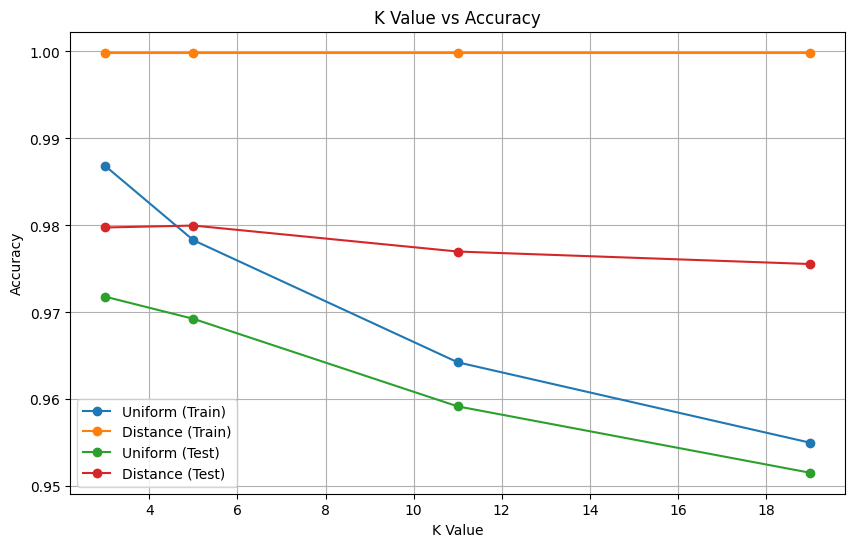

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define the parameters for grid search
knn_params = {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance']}

# Perform grid search with cross-validation
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

# Extracting the results of the grid search
results_df = pd.DataFrame(knn_grid.cv_results_)

# Calculate training and testing accuracies
train_acc_uniform = []
test_acc_uniform = []
train_acc_distance = []
test_acc_distance = []

for n_neighbors in knn_params['n_neighbors']:
    knn_classifier_uniform = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    knn_classifier_uniform.fit(X_train, y_train)
    train_acc_uniform.append(accuracy_score(y_train, knn_classifier_uniform.predict(X_train)))
    test_acc_uniform.append(accuracy_score(y_test, knn_classifier_uniform.predict(X_test)))

    knn_classifier_distance = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    knn_classifier_distance.fit(X_train, y_train)
    train_acc_distance.append(accuracy_score(y_train, knn_classifier_distance.predict(X_train)))
    test_acc_distance.append(accuracy_score(y_test, knn_classifier_distance.predict(X_test)))

# Plotting train and testing accuracy vs. the number of k
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(knn_params['n_neighbors'], train_acc_uniform, marker='o', label='Uniform (Train)')
plt.plot(knn_params['n_neighbors'], train_acc_distance, marker='o', label='Distance (Train)')

# Plot testing accuracy
plt.plot(knn_params['n_neighbors'], test_acc_uniform, marker='o', label='Uniform (Test)')
plt.plot(knn_params['n_neighbors'], test_acc_distance, marker='o', label='Distance (Test)')

plt.title('K Value vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
